In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *

def KL(P, Q):
    epsilon = 0.001
    P = P + epsilon
    Q = Q+ epsilon
    divergence = np.sum(P*np.log(P/Q))
    return divergence

def readdata(filename):
    class_TC=pd.read_csv(filename, index_col=0 ) #Class1 TC Dataset
    class_TC.fillna(0, inplace = True)        #Replace "NaN" into 0 value
    class_TC.isnull().values.any
    num_of_compounds = len(class_TC)  #Number of Query
    print(num_of_compounds)
    names = list(class_TC)               #extract the name of each compound(first column)
    return class_TC

def calc_pdf(Dataset):
    compounds = {}
    Class_pdfs = {} 
    x = np.linspace(0,1,101)
    
    for i in range(0, len(Dataset.T)):             #Columns   
        compounds[i]=Dataset.iloc [:, i].values
        Class_pdfs[i] = gaussian_kde(compounds[i]).pdf(x)
    return Class_pdfs

def calc_Rep_pdf(pdf_dict):
    Class_rep_pdf =np.zeros(101)
    for i in range(0, len(pdf_dict)):
        Class_rep_pdf += pdf_dict[i]
    Class_rep_pdf = Class_rep_pdf/len(pdf_dict)   #Average(Representative) pdf for each class
    return Class_rep_pdf

def calc_entropy(Cross_TC_pdf, Rep_pdfA, Rep_pdfB, name):
    Class_KLD_QA = {}
    Class_KLD_QB = {}
    Class_KLD_QA_reverse = {}
    Class_KLD_QB_reverse = {}
    Class_JSD_QA = {}
    Class_JSD_QB = {}
    
    for i in range(0, len(Cross_TC_pdf)):              
        Class_KLD_QA[i] = KL(Cross_TC_pdf[i]/sum(Cross_TC_pdf[i]), Rep_pdfA/sum(Rep_pdfA))        
        Class_KLD_QB[i] = KL(Cross_TC_pdf[i]/sum(Cross_TC_pdf[i]), Rep_pdfB/sum(Rep_pdfB)) 
        Class_KLD_QA_reverse[i] = KL((Rep_pdfA/sum(Rep_pdfA)), (Cross_TC_pdf[i]/sum(Cross_TC_pdf[i])))
        Class_KLD_QB_reverse[i] = KL((Rep_pdfB/sum(Rep_pdfB)), (Cross_TC_pdf[i]/sum(Cross_TC_pdf[i])))
        Class_JSD_QA[i] = (KL(Cross_TC_pdf[i]/sum(Cross_TC_pdf[i]), Rep_pdfA/sum(Rep_pdfA))  + KL(Rep_pdfA/sum(Rep_pdfA) , Cross_TC_pdf[i]/sum(Cross_TC_pdf[i])))/2    
        Class_JSD_QB[i] = (KL(Cross_TC_pdf[i]/sum(Cross_TC_pdf[i]), Rep_pdfB/sum(Rep_pdfB))  + KL(Rep_pdfB/sum(Rep_pdfB) ,Cross_TC_pdf[i]/sum(Cross_TC_pdf[i])))/2

    Class_entropy = pd.DataFrame(data = [ Class_KLD_QA.values(), Class_KLD_QB.values(),Class_KLD_QA_reverse.values(),
                                         Class_KLD_QB_reverse.values(),  Class_JSD_QA.values(), Class_JSD_QB.values()],
                                 index = ['Class_KLD_QA', 'Class_KLD_QB', 'Class_KLD_QA_reverse', 'Class_KLD_QB_reverse','Class_JSD_QA', 'Class_JSD_QB'] )
    Class_entropy.to_csv( name+"_entropy.csv", sep=',', encoding='utf-8') 
     
    return Class_entropy.T



def visualize(entropy, pdfA, pdfB, name):
    Hist_Class_KLD_Q1 = entropy['Class_KLD_QA'].values   
    Hist_Class_KLD_Q2= entropy['Class_KLD_QB'].values 
    Hist_Class_KLD_Q1_reverse =  entropy['Class_KLD_QA_reverse'].values   
    Hist_Class_KLD_Q2_reverse =  entropy['Class_KLD_QB_reverse'].values   
    Hist_Class_JSD_Q1= entropy['Class_JSD_QA'].values   
    Hist_Class_JSD_Q2= entropy['Class_JSD_QB'].values   


    plt.subplot(2, 2, 1)
    plt.hist(Hist_Class_KLD_Q1, bins = 200)
    plt.hist(Hist_Class_KLD_Q2, bins = 200)
    plt.ylabel('Class_KL-Divergence')
    plt.xlim(0, 3)

    plt.subplot(2, 2, 2)
    plt.hist(Hist_Class_KLD_Q1_reverse, bins = 200)
    plt.hist(Hist_Class_KLD_Q2_reverse, bins = 200)
    plt.ylabel('Class_KL-Divergence_reverse')
    plt.xlim(0, 3)


    plt.subplot(2, 2, 3)
    plt.hist(Hist_Class_JSD_Q1, bins = 200)
    plt.hist(Hist_Class_JSD_Q2, bins = 200)
    plt.ylabel('Class2_JS--Divergence')

    plt.subplot(2, 2, 4)
    plt.plot(np.linspace(0,1,101), pdfA, np.linspace(0,1,101), pdfB)
    plt.xlabel('Representative pdf of each Classes')

    plt.savefig('Class'+name + '.jpg')
    plt.show()
    return



In [2]:
filename1 = 'cross10-10'
filename2 = 'cross14-14'
filename3 = 'cross14-10'

class1pdf = calc_pdf(readdata(filename1 + '.csv.zip'))
class2pdf = calc_pdf(readdata(filename2+ '.csv.zip'))
cross_pdf = calc_pdf(readdata(filename3 + '.csv.zip'))
class1Rep = calc_Rep_pdf(class1pdf)
class2Rep = calc_Rep_pdf(class2pdf)
cross_Rep = calc_Rep_pdf(cross_pdf)

1055
4167
4167


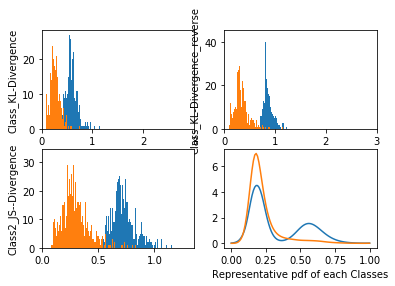

In [3]:

cross_entropy = calc_entropy(cross_pdf, class1Rep, class2Rep, filename3)
visualize(cross_entropy,class1Rep,class2Rep , filename3 )
